# Tarea 2

* Sofía Cruz T. (**@cutsof**)
* Daniel Martínez U. (**@danmarurr**)

**Envío del PR inicial:** lunes 5 de septiembre

**Aceptación del PR:** lunes 19 de septiembre

**NOTA** El máximo número de colaboradores es 2, cuyos nombres deben ser incluidos con claridad a la hora de hacer el PR, por ejemplo, mandándo copia a los coautores. Si usan ideas de cualquier fuente, favor de incluir la referencia apropiada. (En otras palabras, sí está permitido usar otras fuentes, pero incluyan las referencias.)

---

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

# Problema 1

Para resolver este problema implementaremos tres funciones: `mapeo1` para calcular el mapeo, `crea_malla` para crear la malla en $[-1,1]\times[-1,1]$ y finalmente `conteo1` para contar los valores finitos distintos.

In [162]:
using PyPlot
#Pkg.add("PyPlot")

In [3]:
"""
`mapeo1` calcula el término `n` de la función z_{n+1} = z_n^2 + c, donde 
c = 0.12256484161600012 - 0.74486407104im y `z0` es un valor definido por el usuario.
"""
function mapeo1(n::Int64, z0)
    @assert n≥1 "n tiene que ser mayor o igual a 0"
    c = complex(0.12256484161600012,-0.74486407104)
   
    for j in 1:n
        z0 = copy(z0)^2 - c
    end
    return z0
end

"""
`crea_malla` crea una malla en `domRe`x`domIm` usando separaciones Δx = Δ[1] y Δy = Δ[2]. Se regresa una matriz 
con entradas del tipo `Complex{Float64}` con dicha malla.

***Notas:***

- El valor predeterminado para Δ es [0.025, 0.025].

- `domRe` y `domIm` deben ser arreglos de `Float64` con la siguiente información:

`domRe` = [`x_min`, `x_max`], `domIm` = [`y_min`, `y_max`]
"""
function crea_malla(domRe::Array{Float64}, domIm::Array{Float64}, Δ = [0.0025, 0.0025])
    @assert length(domRe) == 2 && length(domIm) == 2 && length(Δ) == 2 "Uno o varios de los argumentos tienen información faltante o sobrante"
    @assert Δ[1] > 0 && Δ[2]> 0 "El valor de separación debe ser positivo"
    @assert Δ[1] < abs(domRe[1] - domRe[2]) && Δ[2] < abs(domIm[1] - domIm[2]) "El valor de separación debe ser menor al tamaño de los intervalos"
    δx = collect(domRe[1]:Δ[1]:domRe[2])
    δy = collect(domIm[1]:Δ[2]:domIm[2])
    n = length(δx)
    m = length(δy)
    malla = zeros(Complex{Float64}, n, m)
    #Llenamos la malla
    for j in 1:m
        for i in 1:n
            malla[i, j] = δx[j] + im*δy[m + 1 - i]
        end
    end
    return malla
end

"""
`complexmap` mapea la función compleja `f` en la malla de números complejos `malla`
"""
function complexmap(f::Function, malla::Array{Complex{Float64},2})
    fz = zeros(malla)
    for j in 1:length(malla)
        fz[j] = f(malla[j])
    end
    return fz
end

"""
`problema1` realiza el mapeo de la función considerada en el problema 1 en el dominio considerado (por defecto), usando
`n` iteraciones.
"""
function problema1(n::Int, domRe = [-1.0,1.0], domIm = [-1.0,1.0], Δ = [0.0025, 0.0025], f = mapeo1)
    @assert n ≥ 0 "n debe ser mayor o igual a 0"
    @assert length(domRe) == 2 && length(domIm) == 2 && length(Δ) == 2 "Uno o varios de los argumentos tienen información faltante o sobrante"
    @assert Δ[1] > 0 && Δ[2]> 0 "El valor de separación debe ser positivo"
    @assert Δ[1] < abs(domRe[1] - domRe[2]) && Δ[2] < abs(domIm[1] - domIm[2]) "El valor de separación debe ser menor al tamaño de los intervalos"
    malla1 = crea_malla(domRe, domIm, Δ)
    f(x) = mapeo1(n, x)
    fm = complexmap(f, malla1)
    
    zm1 = zeros(fm)
    for j in 1:length(fm)
        if abs(fm[j].re) < 1 && abs(fm[j].im) < 1
            zm1[j] = fm[j]
        end
    end
    return zm1
end

problema1 (generic function with 5 methods)

In [4]:
ab = problema1(1000);

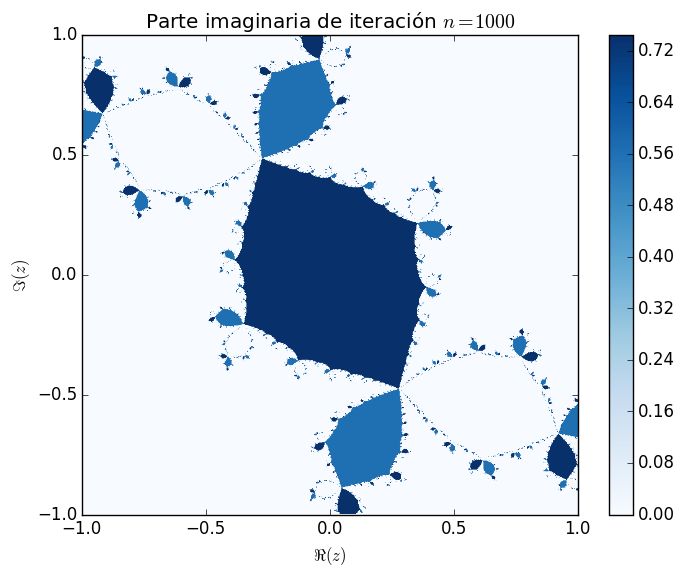

PyObject <matplotlib.text.Text object at 0x7fee972b7610>

In [165]:
imshow(imag(ab),cmap = "Blues", extent =[-1.0, 1.0, -1.0, 1.0],aspect="auto")

xlabel(L"\Re(z)")
ylabel(L"\Im(z)")
colorbar()
title(L"Parte imaginaria de iteración $n=1000$")

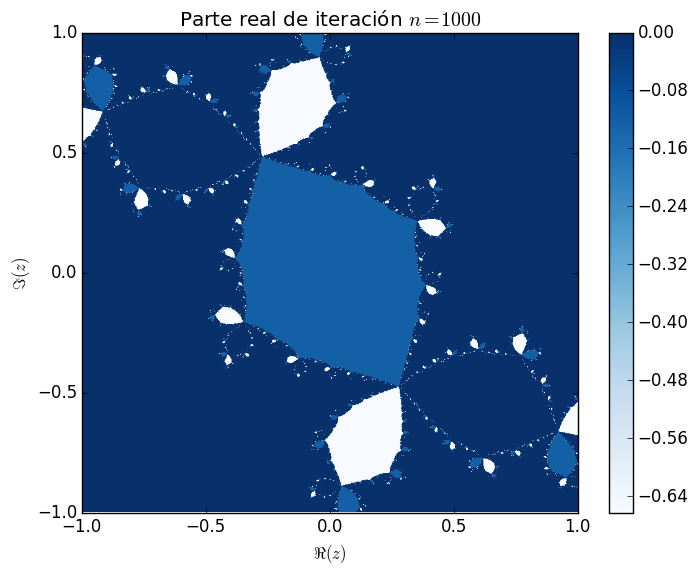

PyObject <matplotlib.text.Text object at 0x7fee97305cd0>

In [166]:
imshow(real(ab),cmap = "Blues", extent =[-1.0, 1.0, -1.0, 1.0],aspect="auto")

xlabel(L"\Re(z)")
ylabel(L"\Im(z)")
colorbar()
title(L"Parte real de iteración $n=1000$")

Se usa la función `unique` que regresa los valores no repetidos de un arreglo. De forma que así sabemos los valors que alcanza el mapeo despué de 1000 iteraciones.

In [40]:
unique(ab)

4-element Array{Complex{Float64},1}:
                 0.0+0.0im     
           -0.662365+0.562276im
           -0.122565+0.744864im
 8.74762e-6+2.71807e-7im       

Vemos que el último valor en realidad es considerablemente cercano a 0, por lo que se toman las raíces como :
`0.0+0.0im     `
           `-0.662365+0.562276im`
           y
           `-0.122565+0.744864im`

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{x_n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

Definimos un tipo que nos va a mostrar el nuestra semilla x_0 , al lado del valor al que llegó después de la iteración

In [140]:
"""
`iteracion` calcula las`n` iteraciones de la función x_{n+1} = B(x_{n}) = 2x_n \mod 1, donde 
se comienza co un x_0 como valor definido por el usuario. 
"""

function iteracion(n::Int,x)
    y = typeof(x)[x] #Se crea el vector al que vamos a pushear los valores de las iteraciones
    for i in 1:n
        x = mod(2x,1) #Se opera el mapeo
        push!(y,x)
    end
    return y
end

iteracion (generic function with 1 method)

In [141]:
iteracion(5,0)

6-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0

Haciendo el rápido cálculo mencionado, sabemos que el único punto fijo es $x=0$. No sabemos exáctamente cuál será la trayectoria de algún otro número, pero haciéndo un cálculo ráṕido, podemos ver que $x=\frac13$ tiene órbita de logitud 2. Por esto, en nuestro vector resultante deberíamos de ver la órbita.

In [142]:
iteracion(54,1/3)

55-element Array{Float64,1}:
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 0.666667
 0.333333
 ⋮       
 0.666504
 0.333008
 0.666016
 0.332031
 0.664063
 0.328125
 0.65625 
 0.3125  
 0.625   
 0.25    
 0.5     
 0.0     

Acá vemos cómo después de 54 iteraciones, el valor se vuelve $0$.

Ahora hagamos el mismo intento pero con `Rational` en lugar de `Float64`

In [143]:
iteracion(54,1//3)

55-element Array{Rational{Int64},1}:
 1//3
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3
  ⋮  
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3
 2//3
 1//3

Es evidente que usando `Rational` no se pierde información. Ahora veamos por qué `Float64`, sí.

In [145]:
"""
`iteracion_float64` calcula las `n` iteraciones de la función x_{n+1} = B(x_{n}) = 2x_n \mod 1 y el valor de cada
iteración en bits. Se comienza co un x_0 como valor definido por el usuario y se detiene cuando el iterado alcanza 0. 
Regresa el vector de iterados y el vector ASCII con sus bits respectivos.
"""

function iteracion_float64(x)
    y = typeof(x)[x]
    z = ASCIIString[bits(x)]
    while x!=0.0
        x = mod(2x,1)
        push!(y,x)
        push!(z,bits(x))
    end
    return y,z
end

iteracion_float64 (generic function with 1 method)

Usamos la función `iteracion_float64` para ver qué pasa con los bits de $x=\frac13$

In [151]:
x,y=iteracion_float64(1/3)
y

55-element Array{ASCIIString,1}:
 "0011111111010101010101010101010101010101010101010101010101010101"
 "0011111111100101010101010101010101010101010101010101010101010101"
 "0011111111010101010101010101010101010101010101010101010101010100"
 "0011111111100101010101010101010101010101010101010101010101010100"
 "0011111111010101010101010101010101010101010101010101010101010000"
 "0011111111100101010101010101010101010101010101010101010101010000"
 "0011111111010101010101010101010101010101010101010101010101000000"
 "0011111111100101010101010101010101010101010101010101010101000000"
 "0011111111010101010101010101010101010101010101010101010100000000"
 "0011111111100101010101010101010101010101010101010101010100000000"
 "0011111111010101010101010101010101010101010101010101010000000000"
 "0011111111100101010101010101010101010101010101010101010000000000"
 "0011111111010101010101010101010101010101010101010101000000000000"
 ⋮                                                                 
 "0011111111100

Vemos cómo poco a poco los bits van desapareciendo al se "recorridos" dos lugares a cada iteración hasta que solo permanecen la cadena de 1's inicial, la cual toma el valor de `0.5`, cuyo siguiente iterado es `0`. Este comportamiento de "recorrdo" sucederá con cualquier número `Float64`. 

In [153]:
x,y=iteracion_float64(rand())
y

53-element Array{ASCIIString,1}:
 "0011111111000111100111111001010100000001111101110011011001001000"
 "0011111111010111100111111001010100000001111101110011011001001000"
 "0011111111100111100111111001010100000001111101110011011001001000"
 "0011111111011110011111100101010000000111110111001101100100100000"
 "0011111111101110011111100101010000000111110111001101100100100000"
 "0011111111101100111111001010100000001111101110011011001001000000"
 "0011111111101001111110010101000000011111011100110110010010000000"
 "0011111111100011111100101010000000111110111001101100100100000000"
 "0011111111001111100101010000000111110111001101100100100000000000"
 "0011111111011111100101010000000111110111001101100100100000000000"
 "0011111111101111100101010000000111110111001101100100100000000000"
 "0011111111101111001010100000001111101110011011001001000000000000"
 "0011111111101110010101000000011111011100110110010010000000000000"
 ⋮                                                                 
 "0011111111101

Es fácil ver matemáticamente que todos los racionales, con excepción de las potencias de $\frac12$ que son llevados al 0, tenrán órbitas. Ya que el único número que lleva al 0 es $\frac12$, los irracionales deben de seguir una trayectoria caótica si diverger. Por lo tanto el 0 es un punto fijo neutramente estable, pues cerca de él las iteraciones no convergen ni divergen.